# IEEE SPS Seasonal School on Networked Federated Learning 
# https://ieeespcasfinland.github.io/
# Exericse 1 

Consider data points each of which is characterized by a numeric label $y$ and a numberic feature vector $\mathbf{x}= \big(x_{1},\ldots,x_{n}\big)^{T}$. We would like to find (or learn) a linear map (hypothesis) $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x} = \sum_{j=1}^{n} w_{j} x_{j}$ to predict the label $y$ of a data point based solely on its feature vector. Note that each such predictor map $h(\mathbf{x})$ is fully characterized by its weights vector $\mathbf{w} = \big(w_{1},\ldots,w_{n}\big)^{T}$ which is often indicated by the notation $h^{(\mathbf{w})}$. 

A popular performance measure for the usefulness of a linear predictor is the squared error loss. Given a set of labeled data points $\big( \mathbf{x}^{(1)},y^{(1)} \big),\ldots,\big(\mathbf{x}^{(m)},y^{(m)} \big)$, we learn a weight vector by minimizing the average squared error (mean squared error or MSE): 
$$ \sum_{i=1}^{m} \big( h(\mathbf{x}^{(i)}) - y^{(i)} \big)^2.$$ 

Chapter 5. of mlbook.cs.aalto.fi shows that minimizing the MSE is equivalent to solving 
$$ \min_{\mathbf{w}} f(\mathbf{w}) \mbox{ , with } f(\mathbf{w}) := \| \mathbf{y} - \mathbf{X} \mathbf{x} \|^{2}_{2}.$$ Here we used the feature matrix $\mathbf{X} = \big( \mathbf{x}^{(1)},\ldots, \big)^{T}$ and the label vector $\mathbf{y} = \big(y^{(1)},\ldots\big)^{T}$. It can be shown that the objective function $f(\mathbf{w})$ is smooth and convex. We can therefore solve it using a sufficient number of gradient descent steps: 
\begin{align} 
\mathbf{w}^{(k+1)} & = \mathbf{w}^{(k)} - \alpha \nabla f(\mathbf{w})  \quad \quad \mbox{ (Generic GD)}. 
\end{align}
The tuning parameter $\alpha$ is known as "step size" or "learning rate". The proper choice for the value of $\alpha$ is crucial for the behaviour of GD methods (see [1, Ch. 5])

Basic matrix calculus reveals that 
$$ \nabla f(\mathbf{w}) = -\mathbf{X}^{T} \big( \mathbf{y} - \mathbf{X} \mathbf{w}\big). \quad \mbox{ (GradientLinReg)}.$$
Combining (Generic GD) with (Gradient LinReg) results in the basic iteration of GD for linear ("least-squares") regression: 
\begin{align} 
\mathbf{w}^{(k+1)} & = \mathbf{w}^{(k)} + \alpha \mathbf{X}^{T} \big( \mathbf{y} - \mathbf{X} \mathbf{w}\big) \quad \quad \mbox{ (LinRegGD)}. 
\end{align}

[1] A. Jung, "Machine Learning: The Basics," Springer, 2022, draft: mlbook.cs.aalto.fi 


# Starter Code - Gradient Descent for Linear Regression. 

The code snippet below generates some data points by randomly drawing feature vectors and using them to construct labels for data points (by a noisy linear combinations of the features). We then compute a fixed number of GD steps (see (LinRegGD)). 

In [11]:
import numpy as np


# define the number of data poins 

samplesize=10

# create a feature matrix whose rows contain the feature vectors of individual data points 
# each data point is characterized by a feature vector (x1,x2) of lenght 2. The first feature 
# x1 is an arbitrary number while the second feature x2 is fixed to be always equal to 1 (a "dummy feature")

X = np.hstack((np.random.randn(samplesize,1),np.ones((samplesize,1))))

# create a "ground-truth" weight vector for synthetically generating labels of data points 
true_w = np.random.randn(2)

# create synthetic labels of data points and store them as the entries of the numpy array y 
y = X.dot(true_w) + np.random.randn(samplesize,)

# the variable "learning_rate" is used to define the step size or learning rate of the GD steps

learning_rate = 1/(2*samplesize)

# define the number of GD steps that will be computed to obtain a weight vector that results 
# in accurate predictions for the label of a datapoint 

nr_iterations = 10

# the numpy array current_weights will be used to store the result of the gradient descent steps 
current_weights = np.zeros(true_w.shape)

# we will use the variable "log_gradient" to store the norm of the gradient computing during each 
# gradient step 

logging_gradient=[]

# for loop repeats the GD steps for a total number of "nr_iterations" 
for _ in range(nr_iterations):
    # compute the gradient of f(w) at the current weight vector (obtained from the previous GD step)
    gradient = -2 * X.transpose().dot(y - X.dot(current_weights))
    # update the current weight vector via the GD step 
    current_weights = current_weights - (learning_rate * gradient)
    # append the norm of the gradient obtained in this iteration to the list "logging_gradient"
    logging_gradient.append(np.linalg.norm(gradient))

learnt_weights = current_weights  # store the finally obtained weight vector in the variable "learnt_weights"
print(log_gradient)

[23.558836794132862, 2.510846941493062, 0.46737596995073316, 0.2739698290080419, 0.1896349055151731, 0.13184773794159377, 0.09167915389419201, 0.06374842828980781, 0.044327004994129005, 0.03082245988889583]


Text(0.5,1,'Gradient Descent Linear Regressor')

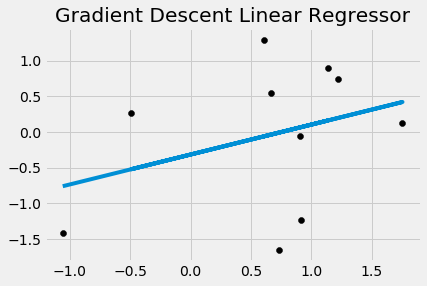

In [12]:
import matplotlib.pyplot as plt

# the following code snipet creates 
plt.style.use('fivethirtyeight')
plt.scatter(X[:,0], y, color='black')
plt.plot(X[:,0], X.dot(learnt_weights))
plt.gca().set_title("Gradient Descent Linear Regressor")

# Starter Code: Read in Data from a csv 

The Python package `Pandas` provides the class DataFrame. A dataframe is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. We can think of DataFrame a table whose rows represent individual datapoints and whose columns represent different properties (which might be features or labels) of the datapoints.

We will demonstrate the usage of a DataFrame on data provided by the Finnish Meteorological Institute (FMI) at https://en.ilmatieteenlaitos.fi/download-observations. We have downloaded hourly weather observations at the FMI station Otsjoki Nuorgam during 01.06.2021 and 31.08.2021. The data is stored in the file air_temp.csv which is located in the same directory as this notebook.


In [13]:
import pandas as pd 

# read in data from the file "air_temp.csv" and store it 
# in the DataFrame "df"

df = pd.read_csv('air_temp.csv')

# print the first 5 weather recordings in the DataFrame `df`

df.head(5) 

,Year,m,d,Time,Time zone,Air temperature (degC)
0,2021,6,1,00:00,UTC,6.2
1,2021,6,1,01:00,UTC,6.4
2,2021,6,1,02:00,UTC,6.4
3,2021,6,1,03:00,UTC,6.8
4,2021,6,1,04:00,UTC,7.1


In [14]:
# print a concise summary of a DataFrame including the index dtype and columns, non-null values and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    2209 non-null   int64  
 1   m                       2209 non-null   int64  
 2   d                       2209 non-null   int64  
 3   Time                    2209 non-null   object 
 4   Time zone               2209 non-null   object 
 5   Air temperature (degC)  2204 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 103.7+ KB


In [15]:
# change column names

df.columns=['year','month', 'day', 'time', 'time_zone','temperature'] 

# remove rows from dataframe "df" which contain missing values

df = df.dropna(axis=0) #rows are considered as axis 0

# concatenate the 3 columns "year", "month", "day" into a new column "date" in format e.g. 2022-01-26

data = df.assign(date = df["year"].astype(str)+'-'+df["month"].astype(str)+'-'+df["day"].astype(str))

# remove columns "year", "month", "day", "time_zone" that are not used 

data = data.drop(['year','month','day','time_zone'],axis=1)  #columns are axis 1

# switch column order

data = data[['date','time','temperature']]

# print the last 5 weather recordings of the new dataframe 

data.tail(5) 

,date,time,temperature
2204,2021-8-31,20:00,6.1
2205,2021-8-31,21:00,6.4
2206,2021-8-31,22:00,6.2
2207,2021-8-31,23:00,5.6
2208,2021-9-1,00:00,5.5


Sometimes we are interested in a specific column of a DataFrame, e.g. we want to use it as feature/label. we can select a single column using dataframe['column_name'], this will return a Series object. Series object has a method Series.to_numpy() which will give us a NumPy ndarray representing the values in this Series. You will repeatedly use this method through this course.


In [16]:
# Let us select only the column "temperature" of the DataFrame "data"
tmp = data['temperature'] 

print(type(tmp),'\n') # check the type of this object
print(tmp)

<class 'pandas.core.series.Series'> 

0       6.2
1       6.4
2       6.4
3       6.8
4       7.1
       ... 
2204    6.1
2205    6.4
2206    6.2
2207    5.6
2208    5.5
Name: temperature, Length: 2204, dtype: float64


In [17]:
data['temperature'].to_numpy() # extract the values stored in a specific column into a ndarray

array([6.2, 6.4, 6.4, ..., 6.2, 5.6, 5.5])

In [18]:
# select the first weather recording (row) stored in the DataFrame "data"
firstrow = data.iloc[0]  # `0` is the index of the first row

print("The first row: \n",firstrow) 

# select the row with row label name `3` by using data.loc[ ]
# NOTE `3` is interpreted as a row label name , not an integer position along the index
# the row label name could be string or other data type, not only int
rowName3 = data.loc[3] 
print("\n The row with row label name '3': \n",rowName3) 

The first row: 
 date           2021-6-1
time              00:00
temperature         6.2
Name: 0, dtype: object

 The row with row label name '3': 
 date           2021-6-1
time              03:00
temperature         6.8
Name: 3, dtype: object


In [19]:
# we can select a subset of a DataFrame on some condition and create a new DataFrame

# create a "newdataset" which consists only of weather recordings in "data" at "time" `03:00`
newdataset= data[data['time'] == '03:00'] ; 

# print randomly selected five weather recordings (rows) of "newdataset"
newdataset.sample(5) 

,date,time,temperature
747,2021-7-2,03:00,15.3
2187,2021-8-31,03:00,6.7
2115,2021-8-28,03:00,10.6
1899,2021-8-19,03:00,9.8
1491,2021-8-2,03:00,7.0


# Your Task: 

Consider data points that represent individual days at the weather station "..." in Finland. Each data point (day) is characterized by a feature vector $\big(x_{1},x_{2}\big)$ where $x_{1}$ is the minimum daytime temeprature (as recorded by FMI) and $x_{2}=1$ (a "dummy" feature). The label $y$ of a data point (day) is the maximum daytime temperature (recorded by FMI).

Modify the above code to learn a linear predictor of the maximum day-time temperature at the FMI station "...". 